# 0.0. Imports

In [65]:
import pandas as pd
import numpy  as np
import psycopg2 as pg
import pandas.io.sql as psql

import seaborn as sns
import scikitplot as skplt

from matplotlib import pyplot as plt

from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from sklearn import linear_model    as lm

from IPython.core.display  import HTML
from IPython.display       import Image

## 0.1 Helper Functions

In [66]:
# section 1.2
def db_connection(db_host, db_port, db_database, db_user, db_password):
    conn = None
    try:
        conn = psycopg2.connect(
        host = db_host,
        port = db_port,
        database = db_database,
        user = db_user,
        password = db_password,
        )
        print('Conexão do banco de dados PostreSQL bem-sucedida!')
    except OperationalError as e:
        print('Erro {} ocorreu.'.format(e))
    return conn

# section 
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).as_matrix() #cm confusion metrics  crosstab (Calcule uma tabulação cruzada simples de dois (ou mais) fatores)
    n = cm.sum()
    r, k = cm.shape  #número de linhas e colunas
    
    chi2 = ss.chi2_contingency( cm )[0]  #chi2 já tem método para calcular com scipy
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )


def jupyter_settings():
    
    %matplotlib inline 
    #%pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize']=[20,10]
    plt.rcParams['font.size']=10
    
    display( HTML('<style>.container {width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr',False )
    
    sns.set()

In [67]:
jupyter_settings() 

## 0.1. Connection with Database

- O módulo psycopg2 permite estabelecer conexão e consultar um banco de dados PostgreSQL e está disponível como um pacote indicador do Linux, macOS ou WindowsO 
- fetchall () busca todas as linhas no conjunto de resultados e retorna uma lista de tuplas. Se não houver linhas para buscar, o método fetchall () retorna uma lista vazia.

### 1.1 Schema Query

In [98]:
#Credential from SQL
host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = 5432
database = 'comunidadedsdb'
username = 'member'
pwd = 'cdspa'

### 1.2 Connection with Database


In [99]:
#Connecting SQL
conn = pg.connect (
                user = username,
                password = pwd,
                host = host,
                port = port,
                database = database)



### 1.3 Exploration Database

In [86]:
#Getting tables name from database
query = "SELECT * FROM information_schema.tables WHERE table_type = 'BASE TABLE' AND table_schema = 'pa004';"

pd.read_sql_query(query,conn)

/var/folders/55/kp2841xx6lgfq642dzt475640000gn/T/ipykernel_20576/2199212706.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,conn)


,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,comunidadedsdb,pa004,users,BASE TABLE,None,None,None,None,None,YES,NO,None
1,comunidadedsdb,pa004,vehicle,BASE TABLE,None,None,None,None,None,YES,NO,None
2,comunidadedsdb,pa004,insurance,BASE TABLE,None,None,None,None,None,YES,NO,None


In [87]:
#Exploring database

query = """
            SELECT table_schema, table_name FROM information_schema.tables
            WHERE table_type= 'BASE TABLE' AND table_schema='pa004' 
"""

pd.read_sql_query(query,conn)

/var/folders/55/kp2841xx6lgfq642dzt475640000gn/T/ipykernel_20576/1733474152.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,conn)


,table_schema,table_name
0,pa004,users
1,pa004,vehicle
2,pa004,insurance


In [88]:
#Table Information Users
query = """
            SELECT column_name, data_type FROM information_schema.columns
            WHERE table_name= 'users' 
"""
pd.read_sql_query(query,conn)

/var/folders/55/kp2841xx6lgfq642dzt475640000gn/T/ipykernel_20576/853695384.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,conn)


,column_name,data_type
0,id,integer
1,gender,text
2,age,integer
3,region_code,double precision
4,policy_sales_channel,double precision


In [89]:
#Table Information vehicle
query = """
            SELECT column_name, data_type FROM information_schema.columns
            WHERE table_name= 'vehicle' 
"""
pd.read_sql_query(query,conn)

/var/folders/55/kp2841xx6lgfq642dzt475640000gn/T/ipykernel_20576/1863313423.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,conn)


,column_name,data_type
0,id,integer
1,driving_license,integer
2,vehicle_age,text
3,vehicle_damage,text


In [90]:
#Table Information insurance
query = """
            SELECT column_name, data_type FROM information_schema.columns
            WHERE table_name= 'insurance' 
"""
pd.read_sql_query(query,conn)

/var/folders/55/kp2841xx6lgfq642dzt475640000gn/T/ipykernel_20576/1968748016.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,conn)


,column_name,data_type
0,id,integer
1,previously_insured,integer
2,annual_premium,double precision
3,vintage,integer
4,response,integer


### 1.4 Collect Data using PANDAS

In [100]:
query_table_users = """
    SELECT u.id,
         u.gender,
         u.age,
         u.region_code,
         u.policy_sales_channel,
         v.driving_license,
         v.vehicle_age,
         v.vehicle_damage,
         i.previously_insured,
         i.annual_premium,
         i.vintage,
         i.response
  FROM pa004.users u 
  LEFT JOIN pa004.vehicle v ON (u.id = v.id)
  LEFT JOIN pa004.insurance i ON (u.id = i.id)
"""

df = psql.read_sql ( query_table_users, conn )
df.head()


/var/folders/55/kp2841xx6lgfq642dzt475640000gn/T/ipykernel_20576/2704541247.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = psql.read_sql ( query_table_users, conn )


,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,13,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,18,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,31,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,39,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0


In [102]:
df_raw = df.copy()

# 1.0. Data Description

In [125]:
df_raw = pd.read_csv( '../data/raw/train.csv' )

In [126]:
df1 = df_raw.copy()

In [127]:
 cols_new = ['id', 'gender', 'age', 'driving_license', 'region_code', 'previously_insured', 
            'vehicle_age', 'vehicle_damage', 'annual_premium', 'policy_sales_channel', 'vintage', 'response']
            
df1.columns = cols_new  

In [128]:
df1.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 1.1. Data Dimension

In [129]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Columns: {}'.format( df1.shape[1] ) )

Number of Rows: 381109
Number of Columns: 12


## 1.2. Data Types

In [130]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.3. Check NA

In [131]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.4. Data Descriptive

In [132]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'])

In [133]:
# Central Tendency - Mean, Median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


# 2.0. Feature Engineering

In [134]:
df2 =  df1.copy()

In [135]:
# vehicle damage
df2['vehicle_damage'] =  df2['vehicle_damage'].apply( lambda x: 1 if x == 'Yes' else 0 )

In [136]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


# 3.0. Data Filtering

In [137]:
df3 = df2.copy()

# 4.0. EDA

In [138]:
df4 = df3.copy()

## 4.1. Univariate Analysis

<AxesSubplot: xlabel='response', ylabel='age'>

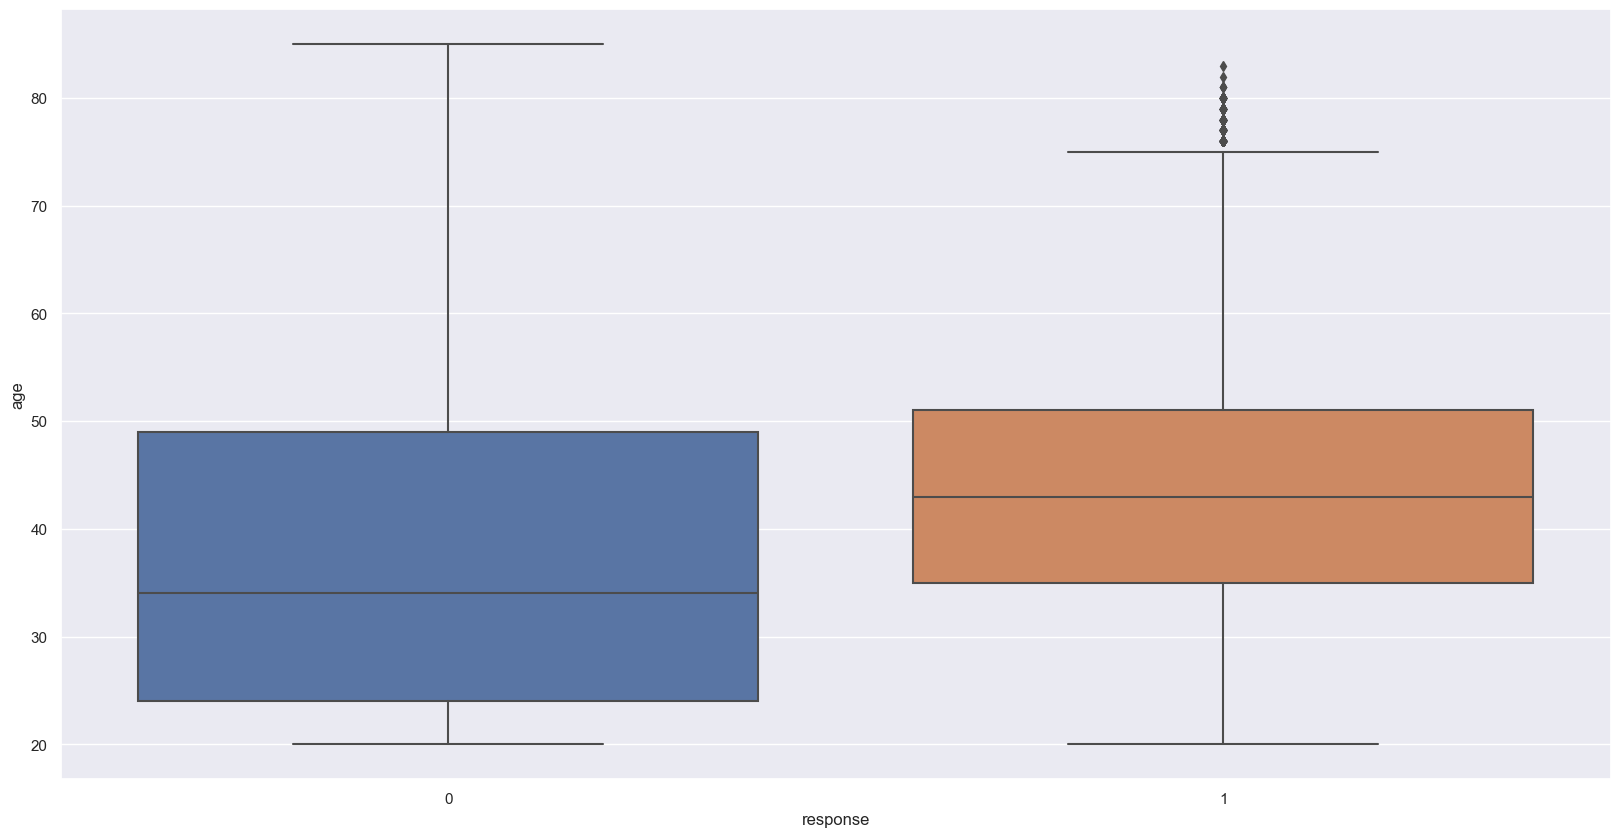

In [139]:
#'age'
sns.boxplot( x='response', y='age', data=df4 )

<AxesSubplot: xlabel='age', ylabel='Count'>

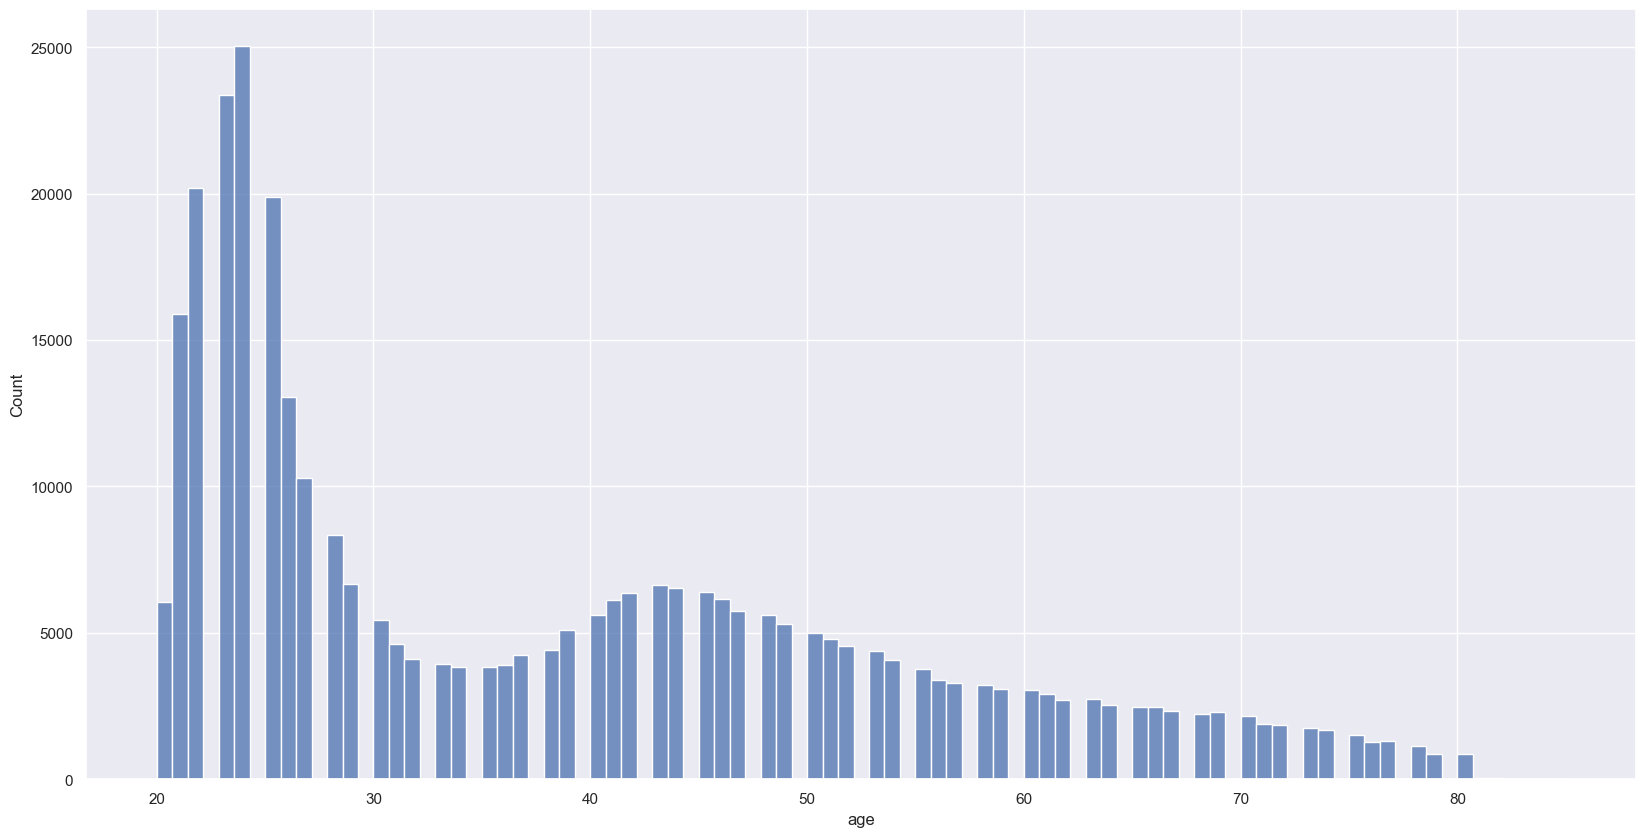

In [140]:
aux00 = df4.loc[df4['response'] == 0, 'age']
sns.histplot( aux00 )

<AxesSubplot: xlabel='age', ylabel='Count'>

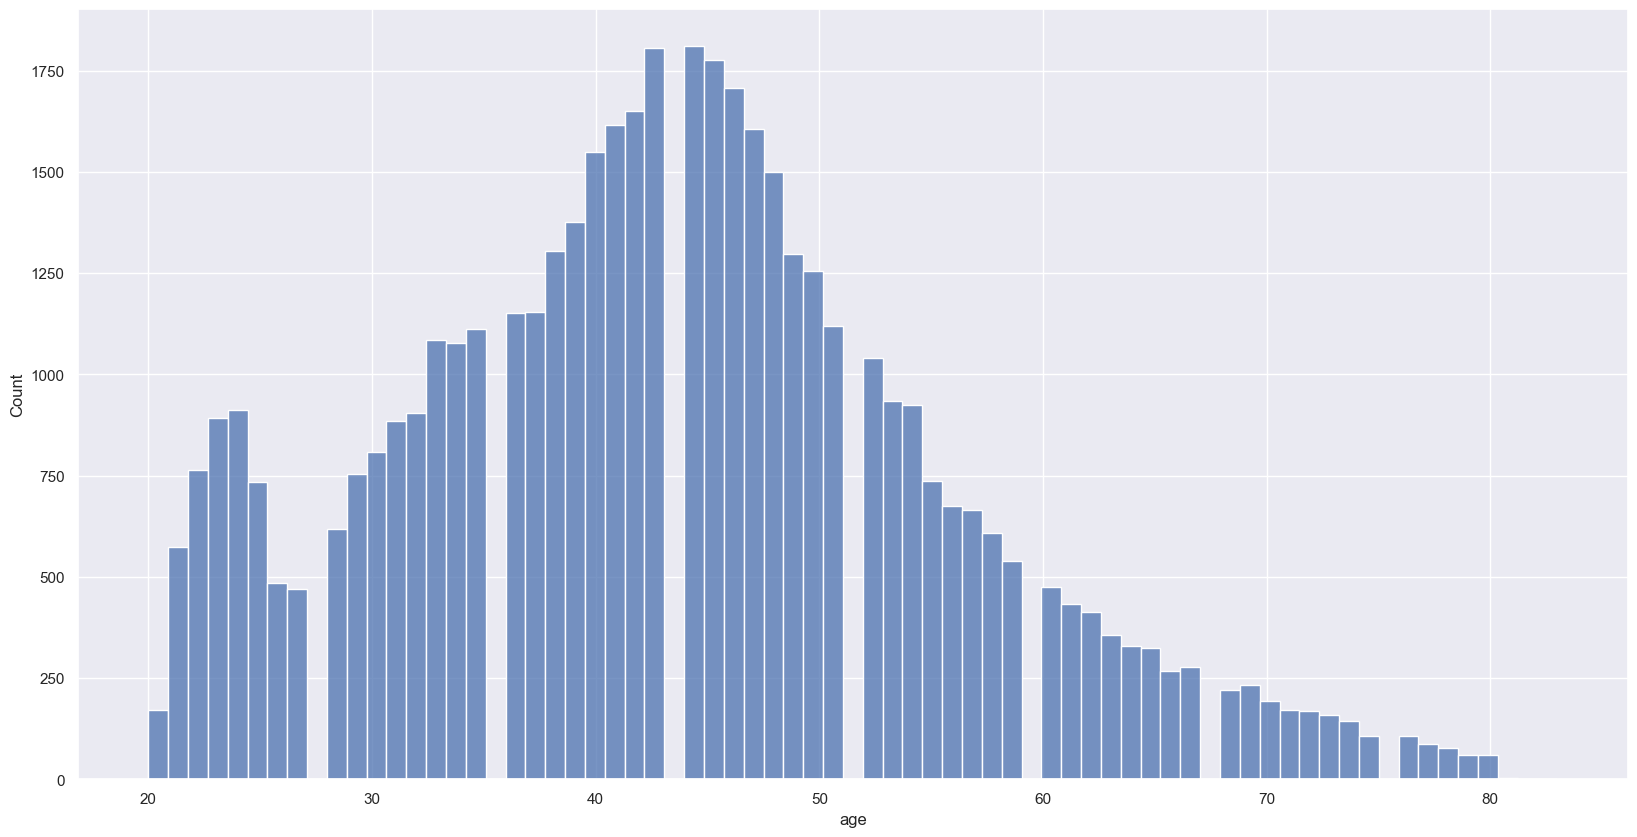

In [141]:
aux00 = df4.loc[df4['response'] == 1, 'age']
sns.histplot( aux00 )

<AxesSubplot: xlabel='response', ylabel='annual_premium'>

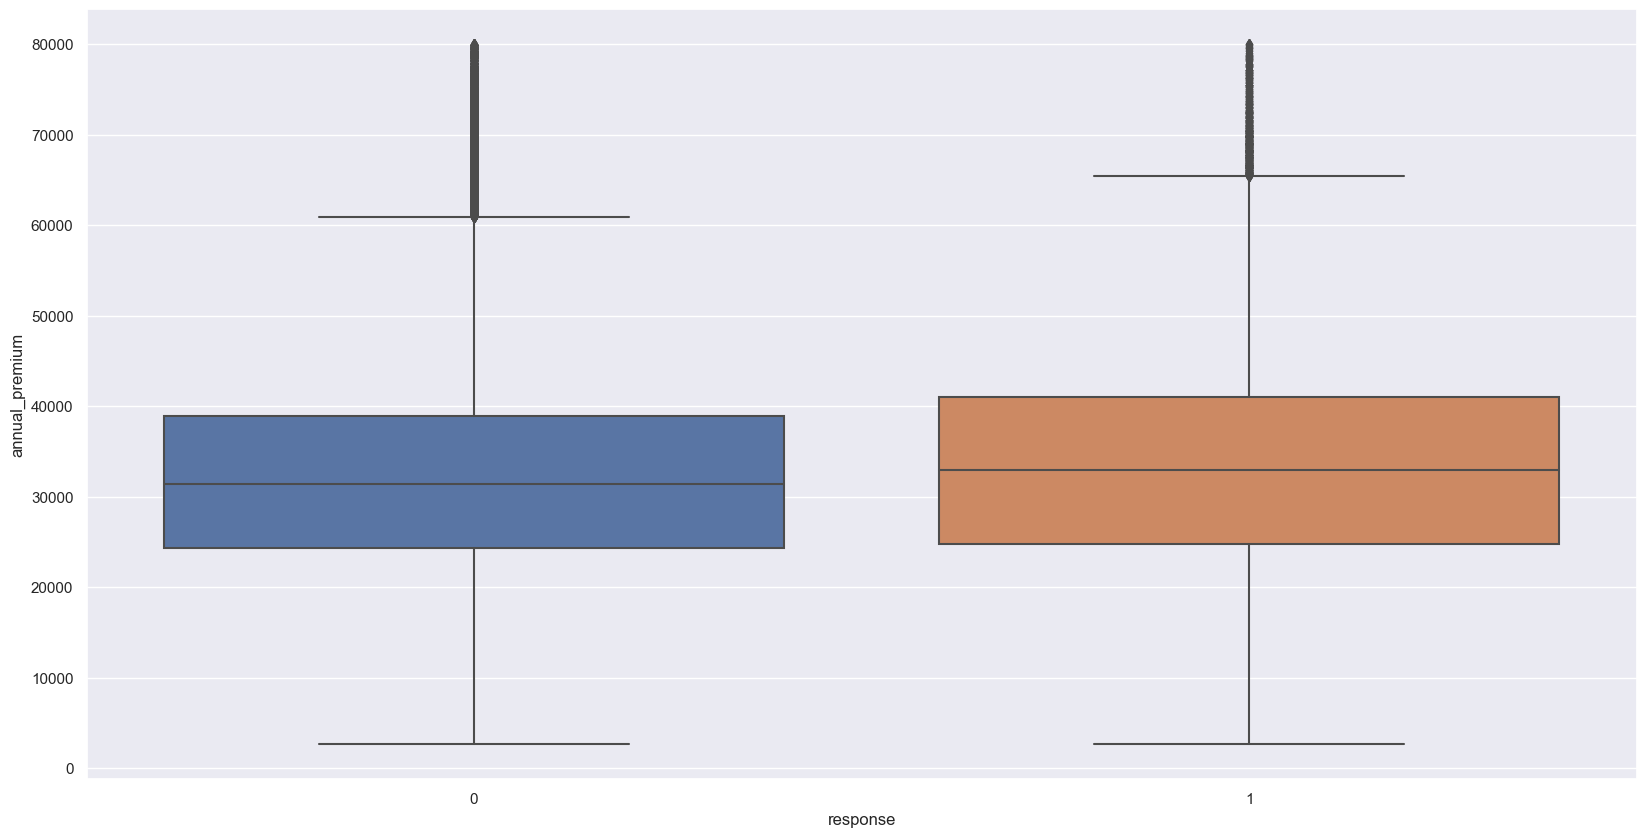

In [142]:
#'annual_premium'
aux = df4[df4['annual_premium'] < 80000] #There are a lot of Outliers
sns.boxplot( x='response', y='annual_premium', data=aux )

<AxesSubplot: xlabel='annual_premium', ylabel='Count'>

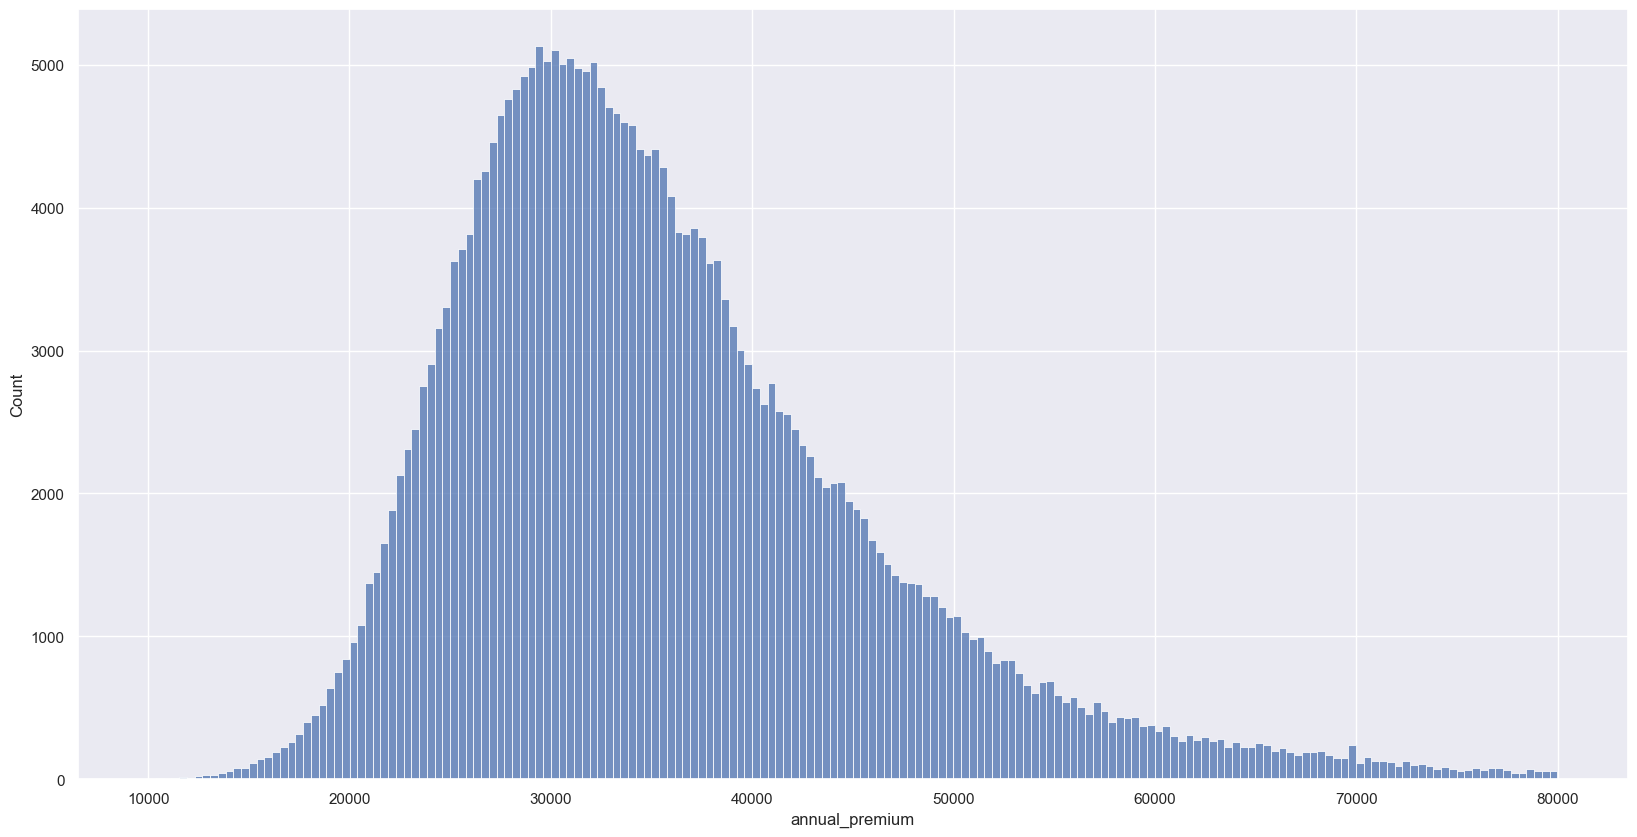

In [143]:
aux = df4[(df4['annual_premium'] > 10000) &(df4['annual_premium'] < 80000 )]
aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
sns.histplot( aux00 )

<AxesSubplot: xlabel='annual_premium', ylabel='Count'>

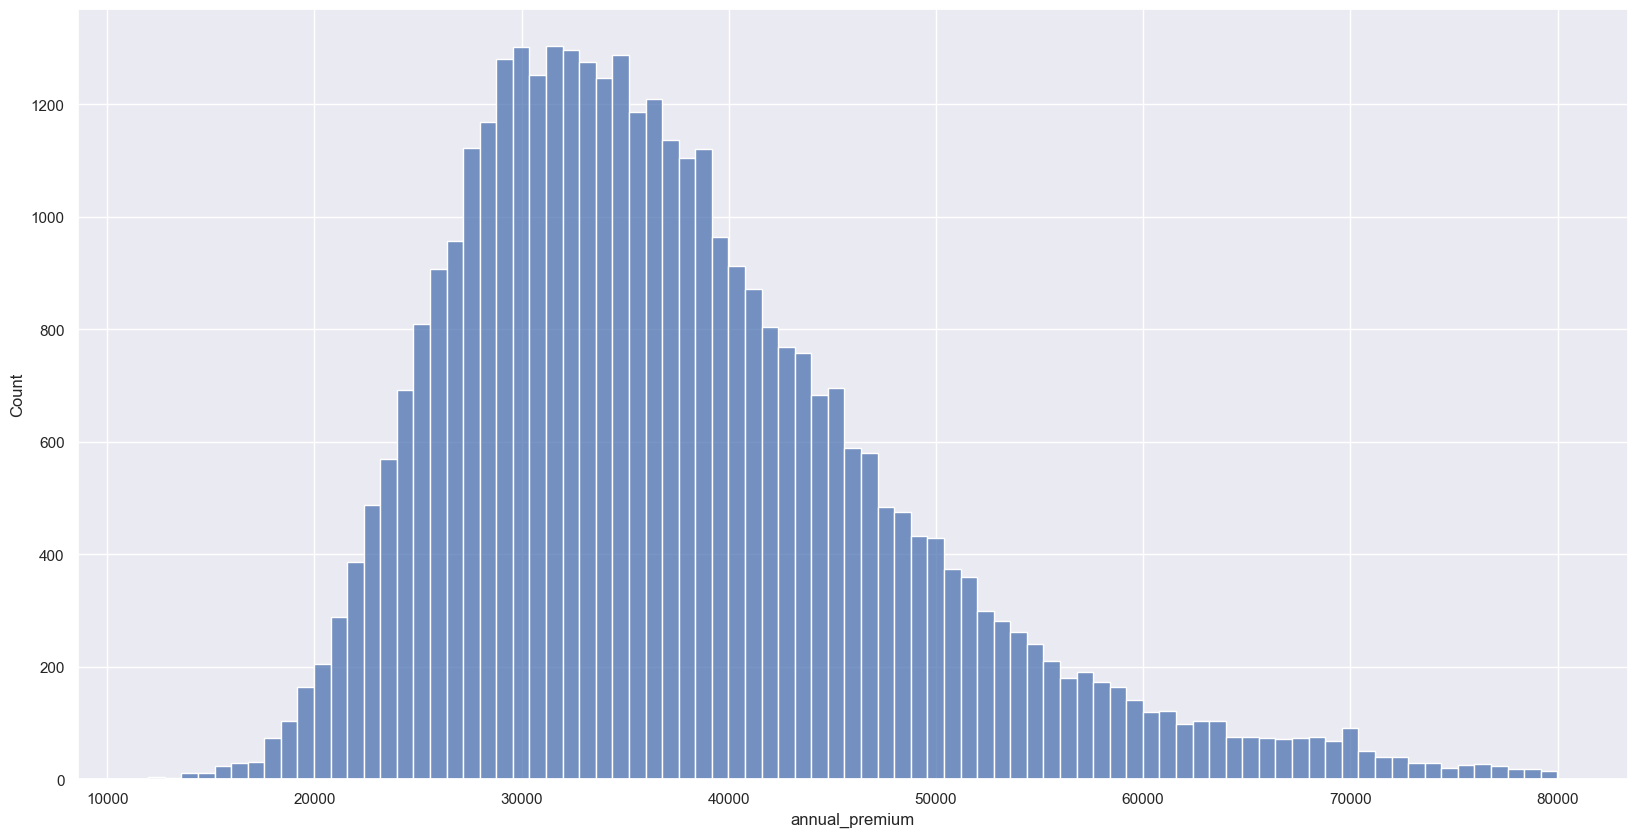

In [144]:
aux00 = aux.loc[aux['response'] == 1, 'annual_premium']
sns.histplot( aux00 )

<AxesSubplot: xlabel='response', ylabel='driving_license'>

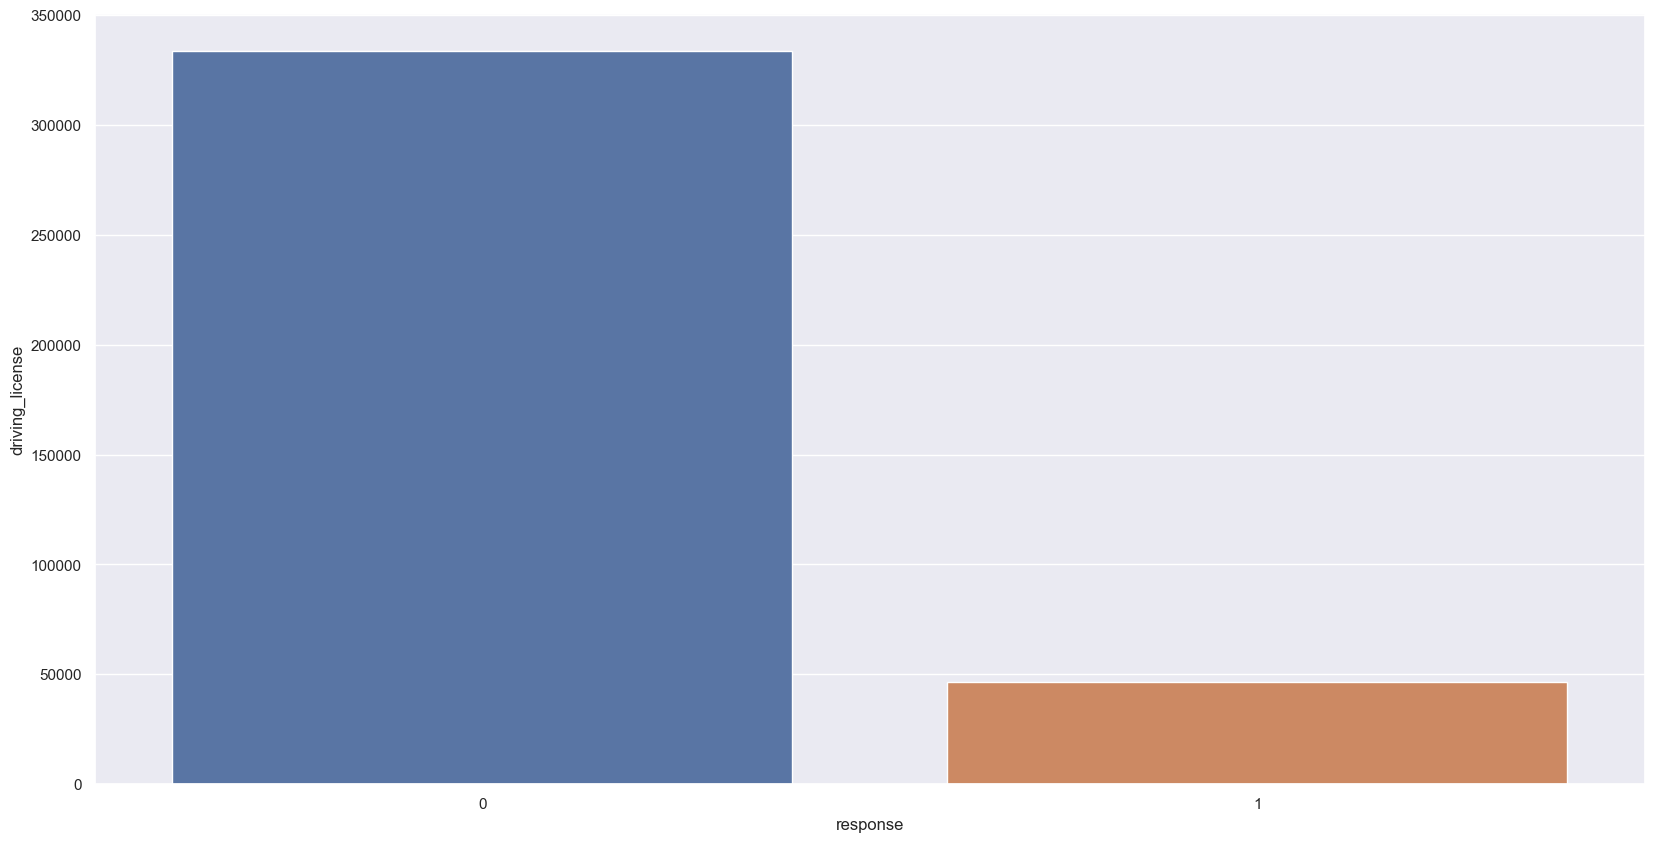

In [145]:
#'driving_license'
aux = df4[['driving_license', 'response']].groupby( 'response' ).sum().reset_index()
aux.head()
aux['driving_license_perc'] = aux['driving_license'] / aux['driving_license'].sum()
sns.barplot( x='response', y='driving_license', data=aux )

<AxesSubplot: xlabel='region_code', ylabel='id'>

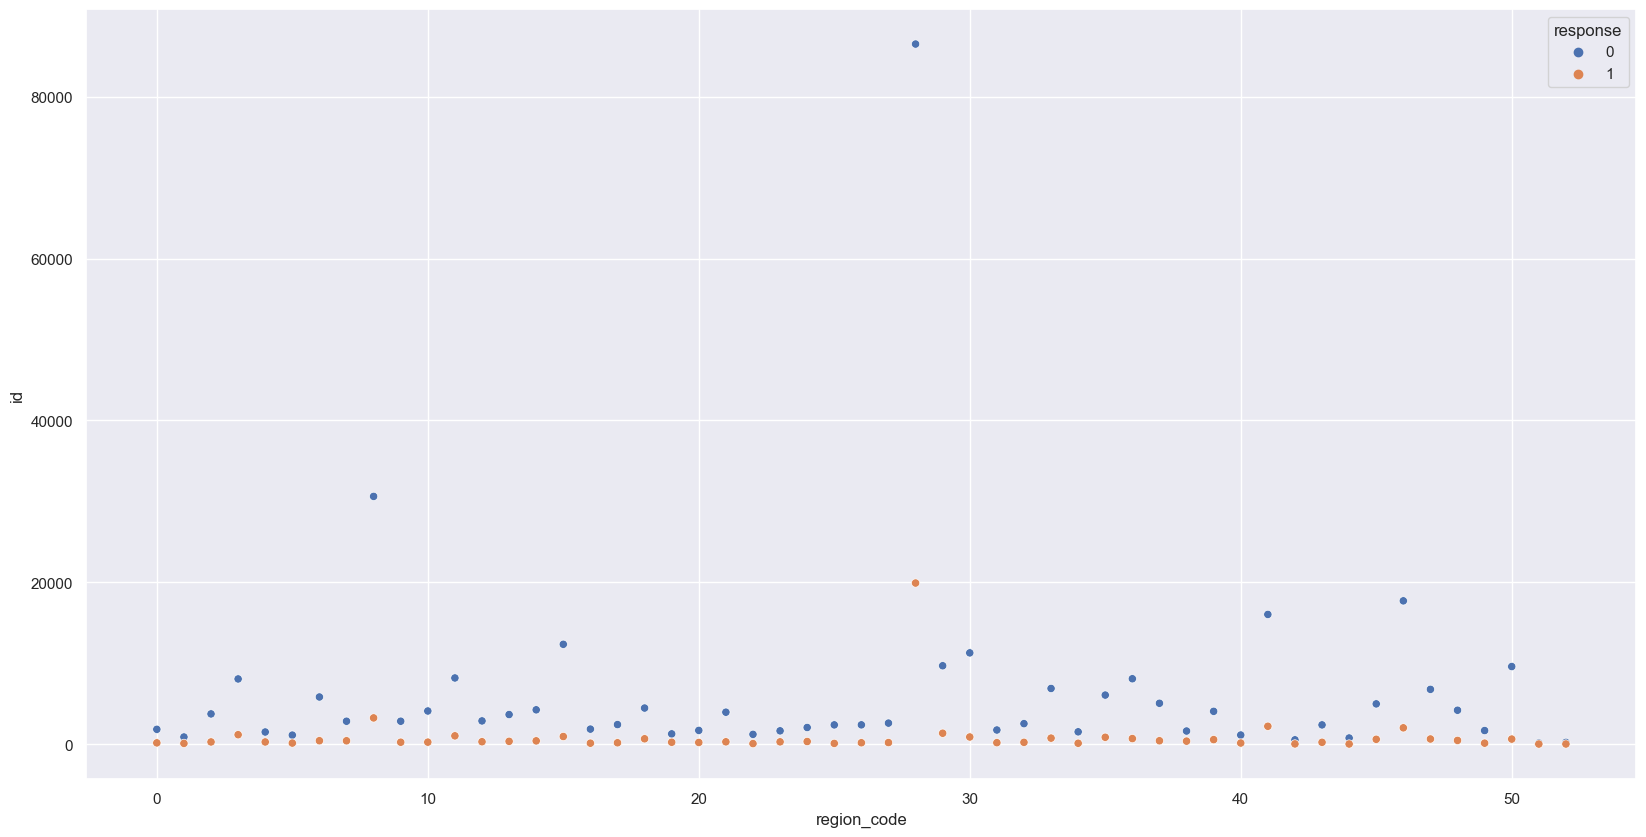

In [146]:
# 'region_code'
aux0 = df4[['id', 'region_code', 'response']].groupby( ['region_code', 'response'] ).count().reset_index()

sns.scatterplot( x='region_code', y='id', hue='response', data=aux0)

In [147]:
#'gender'
df4[['gender', 'response']].value_counts( normalize=True ).reset_index()

,gender,response,0
0,Male,0,0.465914
1,Female,0,0.411523
2,Male,1,0.074847
3,Female,1,0.047716


In [148]:
#'previously_insured'
pd.crosstab( df4['previously_insured'], df4['response'] ).apply( lambda x: x / x.sum(), axis=1 )

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [149]:
#'vehicle_age'
df4[['vehicle_age', 'response']].value_counts( normalize=True ).reset_index()

,vehicle_age,response,0
0,1-2 Year,0,0.434285
1,< 1 Year,0,0.413488
2,1-2 Year,1,0.091328
3,> 2 Years,0,0.029663
4,< 1 Year,1,0.018897
5,> 2 Years,1,0.012338


<AxesSubplot: xlabel='response', ylabel='policy_sales_channel'>

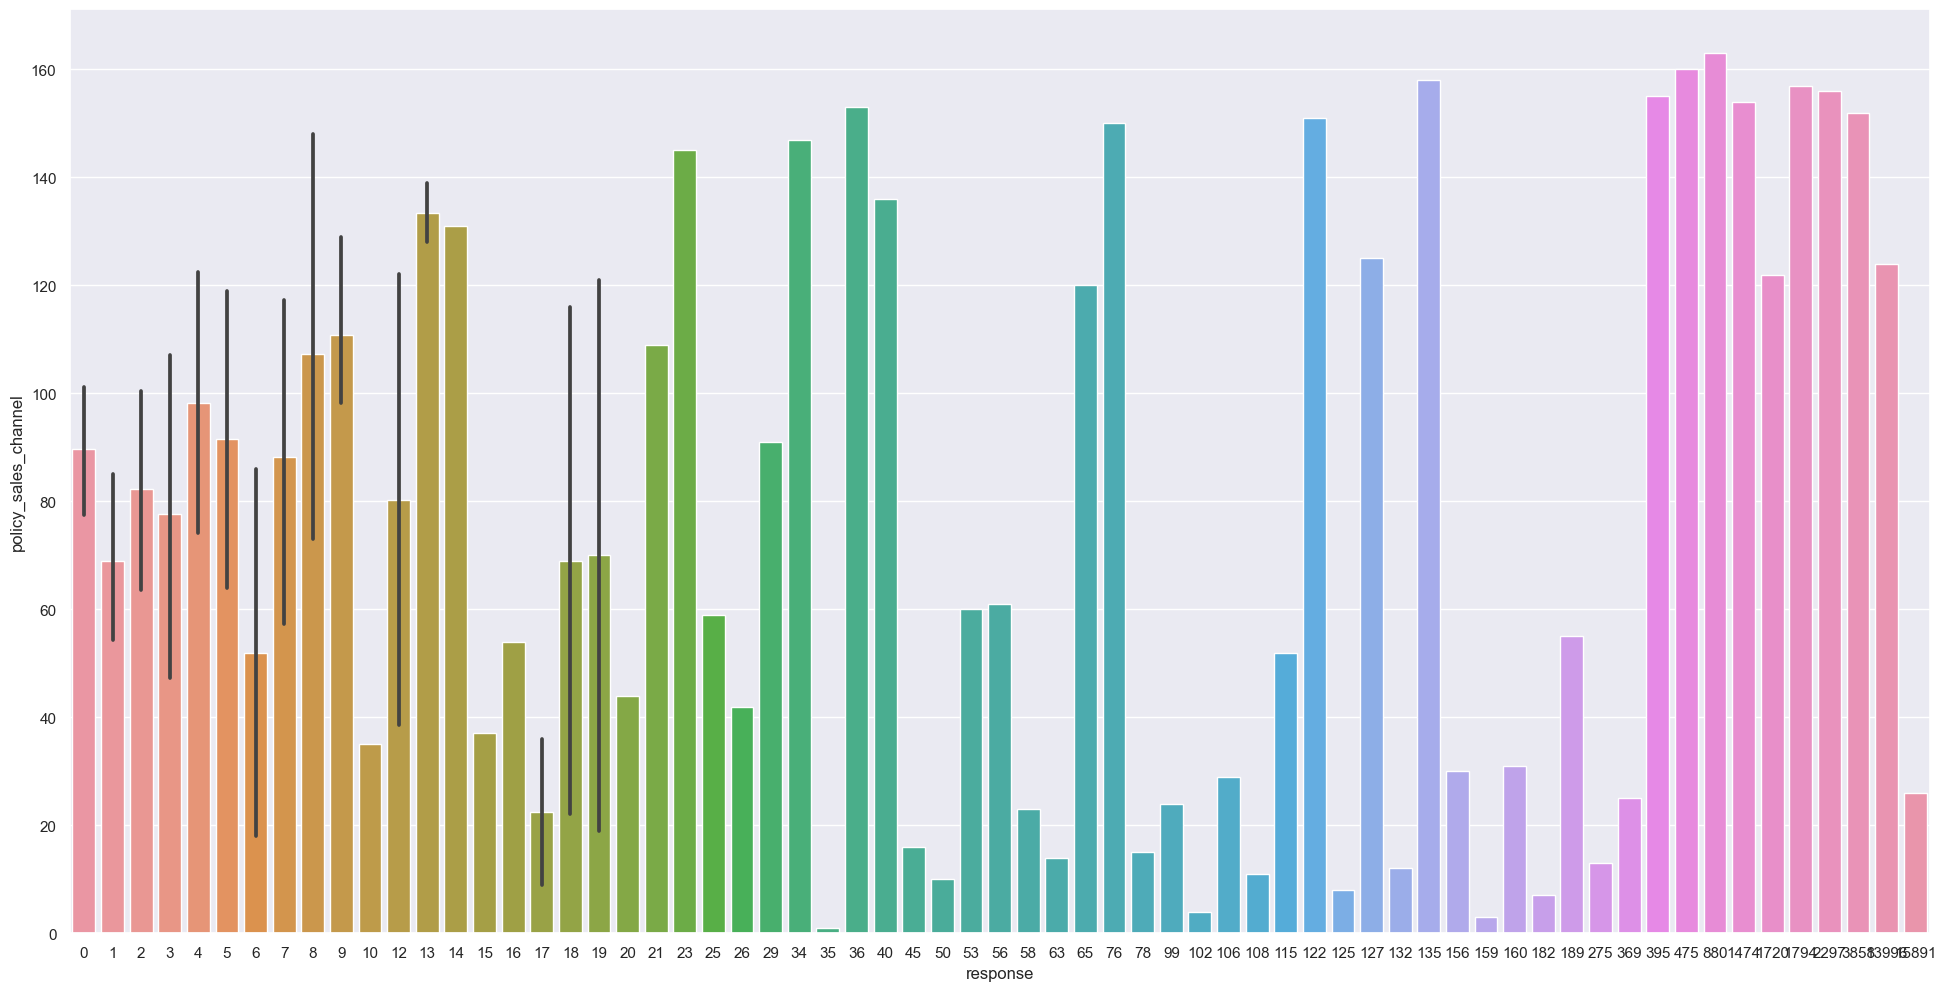

In [150]:
#'policy_sales_channel'
plt.figure( figsize=(24, 12 ))
aux = df4[['policy_sales_channel', 'response']].groupby( 'policy_sales_channel').sum().reset_index()
sns.barplot( x='response', y='policy_sales_channel', data=aux )

<AxesSubplot: xlabel='response', ylabel='vintage'>

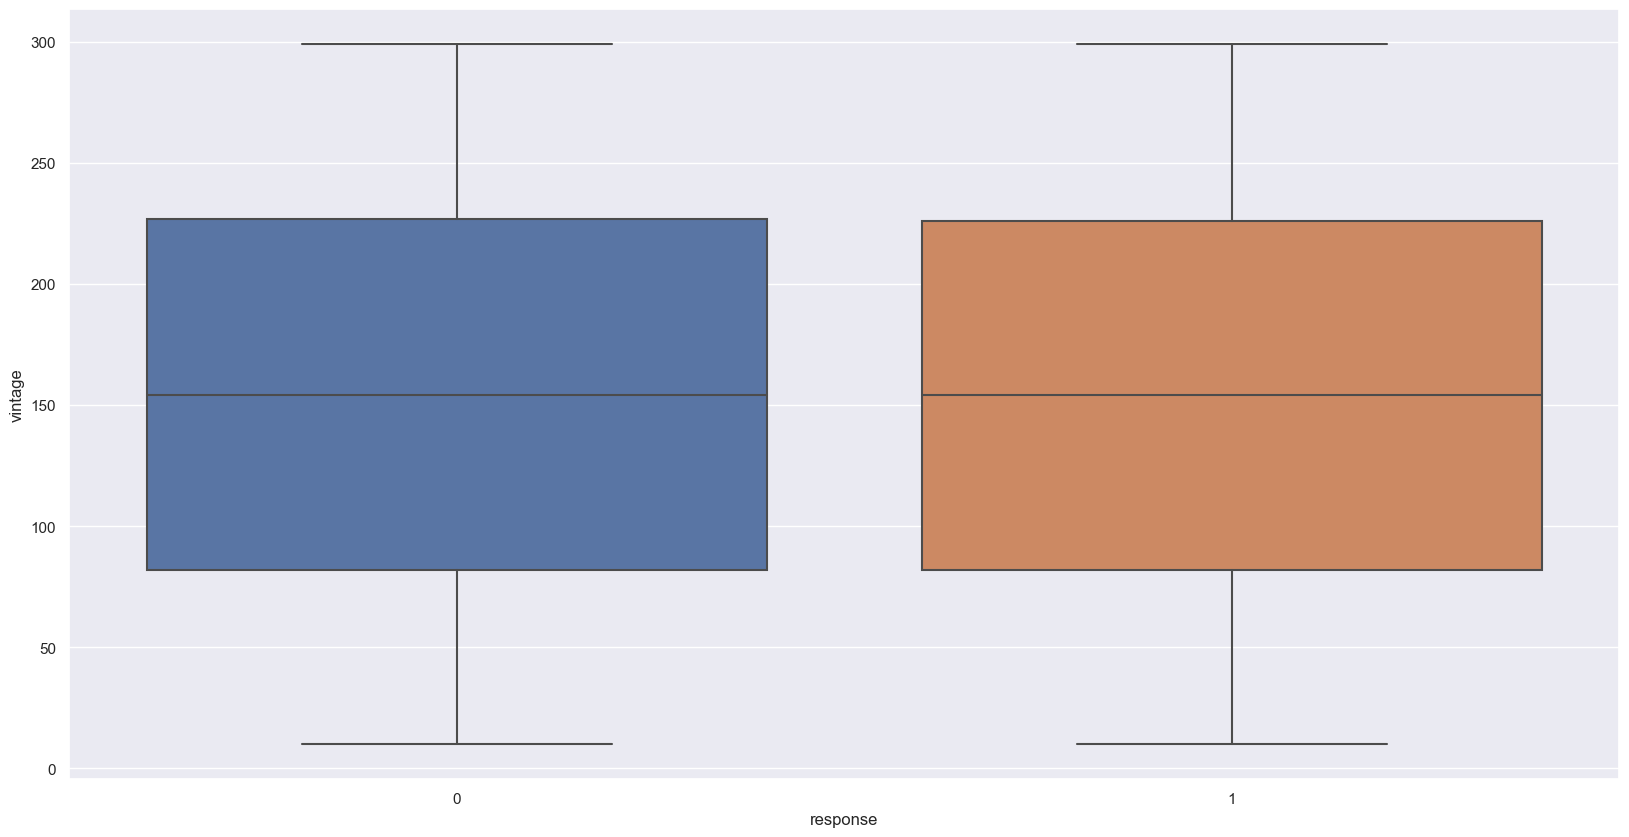

In [151]:
#'vintage'
sns.boxplot( x='response', y='vintage', data=df4 )

<AxesSubplot: xlabel='vintage', ylabel='Count'>

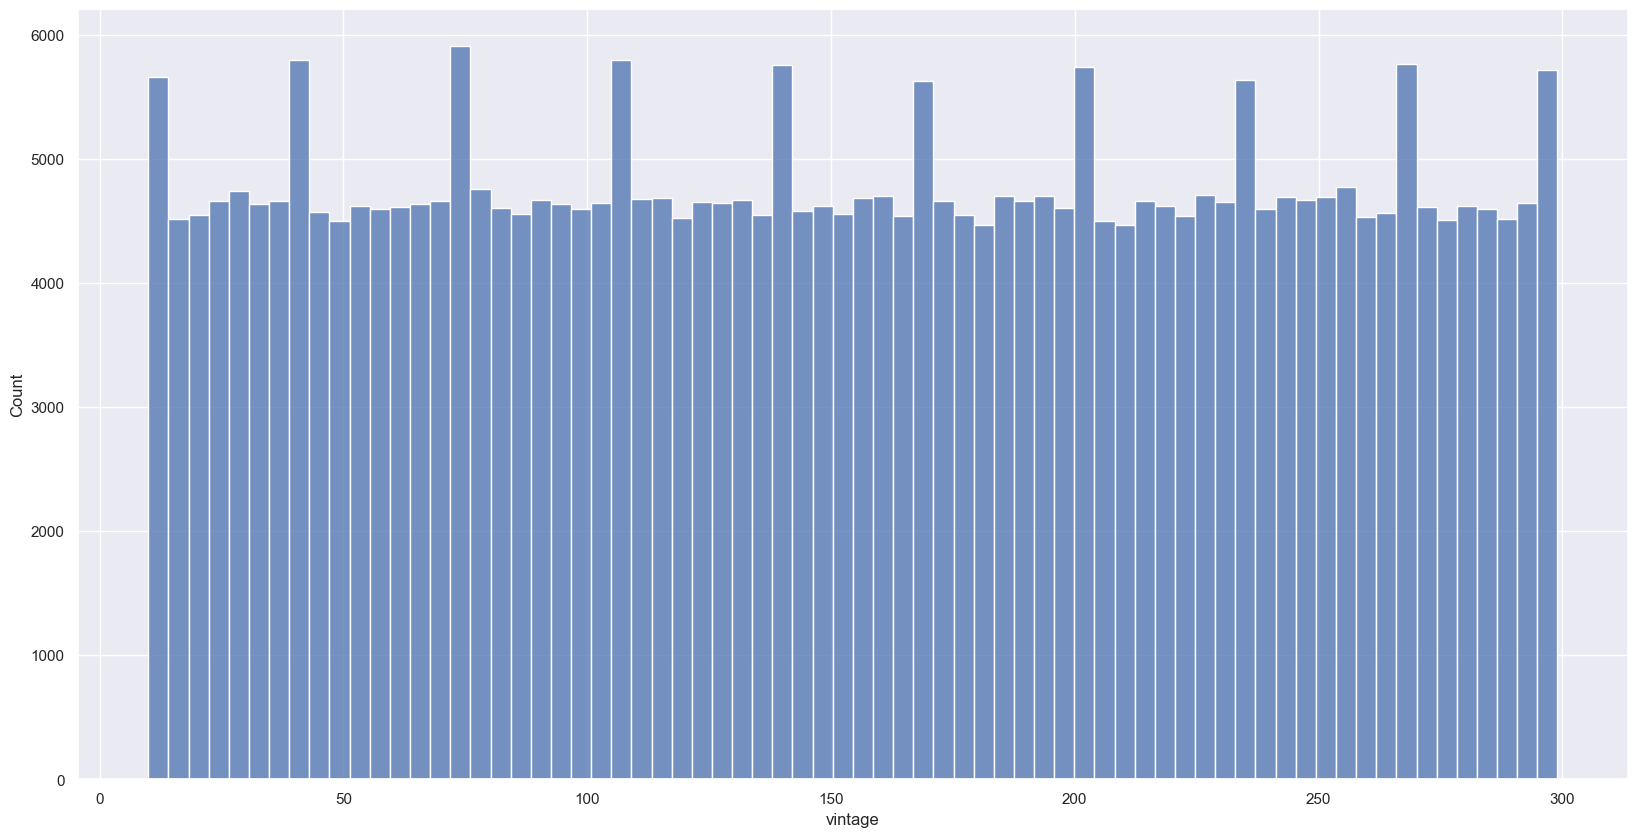

In [152]:
aux00 = df4.loc[df4['response'] == 0, 'vintage']
sns.histplot( aux00 )

<AxesSubplot: xlabel='vintage', ylabel='Count'>

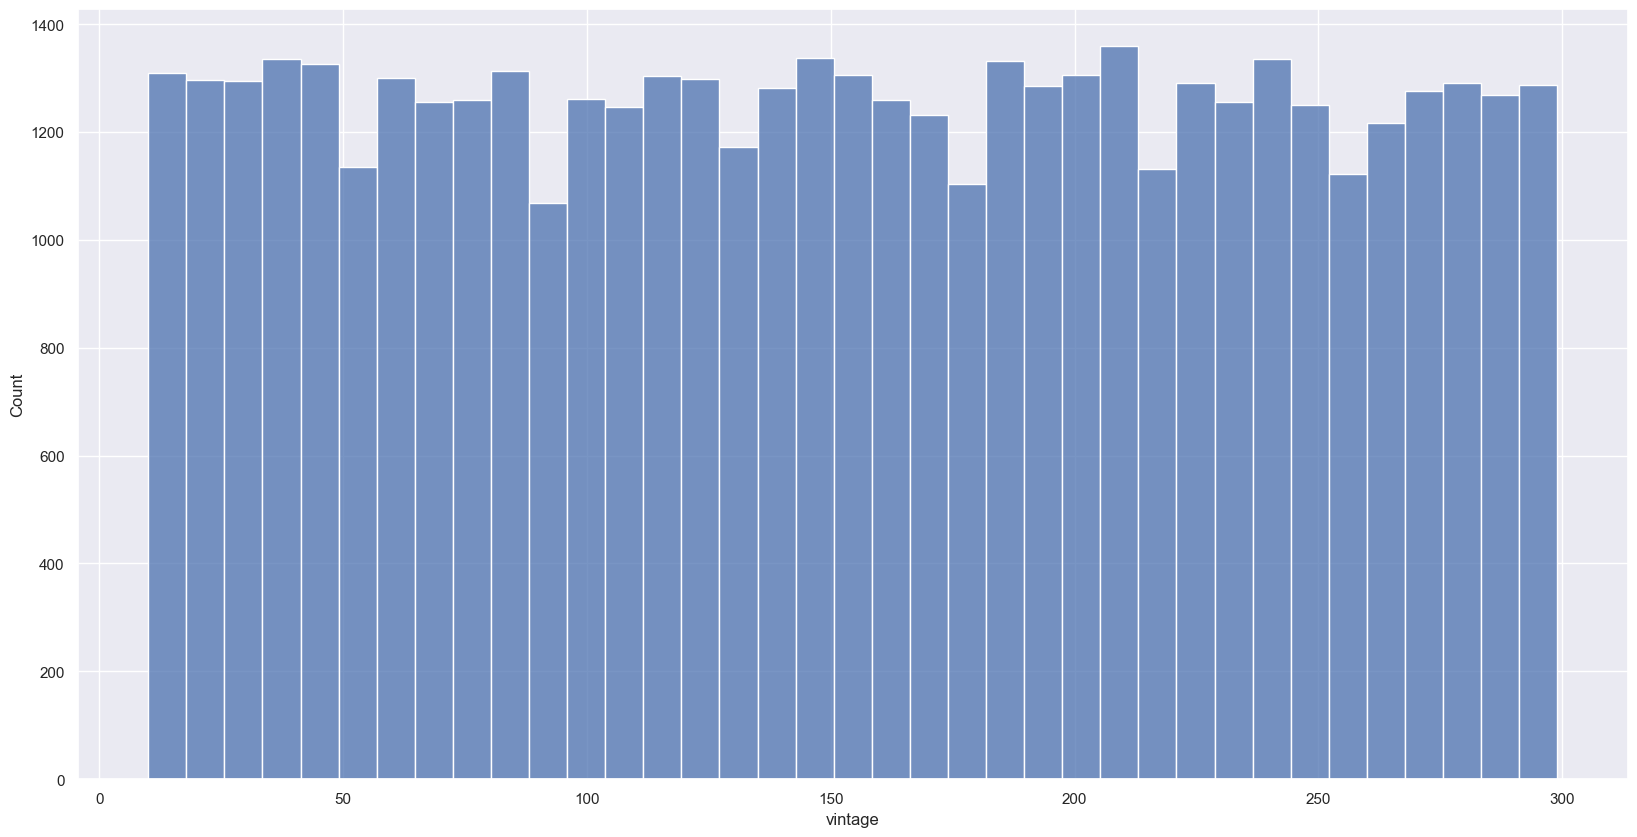

In [153]:
aux00 = df4.loc[df4['response'] == 1, 'vintage']
sns.histplot( aux00 )

# 5.0. Data Preparation

In [167]:
df5 = df4.copy()

In [168]:
#Slipt Dataset for Test and Traninng 

X = df4.drop( 'response', axis=1 )
y = df4['response'].copy() 

x_train, x_validation, y_train, y_validation = ms.train_test_split( X, y, test_size=0.20 )

df5 = pd.concat( [x_train, y_train], axis=1 )

## Standardization

In [169]:
ss = pp.StandardScaler()

# annual_premium
df5['annual_premium'] = ss.fit_transform( df5[['annual_premium']].values )

## Rescaling

In [170]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# Age
df5['age'] = mms_age.fit_transform( df5[['age']].values )

# vintage
df5['vintage'] = mms_vintage.fit_transform( df5[['vintage']].values )

## Encoder

In [171]:
# gender - *One Hot Encoding* / Target Encoding
target_encode_gender = df5.groupby( 'gender' )['response'].mean()
df5.loc[:, 'gender'] = df5['gender'].map( target_encode_gender )

# region_code - Target Encoding / Frequency Encoding
target_encode_region_code = df5.groupby( 'region_code' )['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map( target_encode_region_code )

# vehicle_age - One Hot Encoding / Frequency Encoding
df5 = pd.get_dummies( df5, prefix='vehicle_age', columns=['vehicle_age'] )

# policy_sales_channel - Target Encoding / *Frequency Encoding*
fe_policy_sales_channel = df5.groupby( 'policy_sales_channel' ).size() / len( df5 ) 
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map( fe_policy_sales_channel )

/var/folders/55/kp2841xx6lgfq642dzt475640000gn/T/ipykernel_5909/1083007473.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df5.loc[:, 'gender'] = df5['gender'].map( target_encode_gender )


## 5.4. Validation Preparation

In [172]:
# gender
x_validation.loc[:, 'gender'] =  x_validation.loc[:, 'gender'].map( target_encode_gender )

# age
x_validation.loc[:, 'age'] = mms_age.transform( x_validation[['age']].values )

# region_code
x_validation.loc[:, 'region_code'] = x_validation.loc[:, 'region_code'].map( target_encode_region_code )

# vehicle_age
x_validation = pd.get_dummies( x_validation, prefix='vehicle_age', columns=['vehicle_age'] )

# annual_premium
x_validation.loc[:, 'annual_premium'] = ss.transform( x_validation[['annual_premium']].values )

# policy_sales_channel
x_validation.loc[:, 'policy_sales_channel'] = x_validation['policy_sales_channel'].map( fe_policy_sales_channel )

# vintage
x_validation.loc[:, 'vintage'] = mms_vintage.transform( x_validation[['vintage']].values )

# fillna
x_validation = x_validation.fillna( 0 )

/var/folders/55/kp2841xx6lgfq642dzt475640000gn/T/ipykernel_5909/1030236340.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_validation.loc[:, 'gender'] =  x_validation.loc[:, 'gender'].map( target_encode_gender )


# 6.0. Feature Selection

## 6.2. Features Importancia

In [173]:
# model definition
forest = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1 )

# data preparation
x_train_n = df5.drop( ['id', 'response'], axis=1 )
y_train_n = y_train.values
forest.fit( x_train_n, y_train_n )

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature ranking:
                 feature  importance
0                vintage    0.272091
0         annual_premium    0.244466
0                    age    0.166267
0            region_code    0.104254
0         vehicle_damage    0.069570
0   policy_sales_channel    0.060323
0     previously_insured    0.055252
0   vehicle_age_< 1 Year    0.014133
0   vehicle_age_1-2 Year    0.006259
0                 gender    0.004839
0  vehicle_age_> 2 Years    0.002069
0        driving_license    0.000475


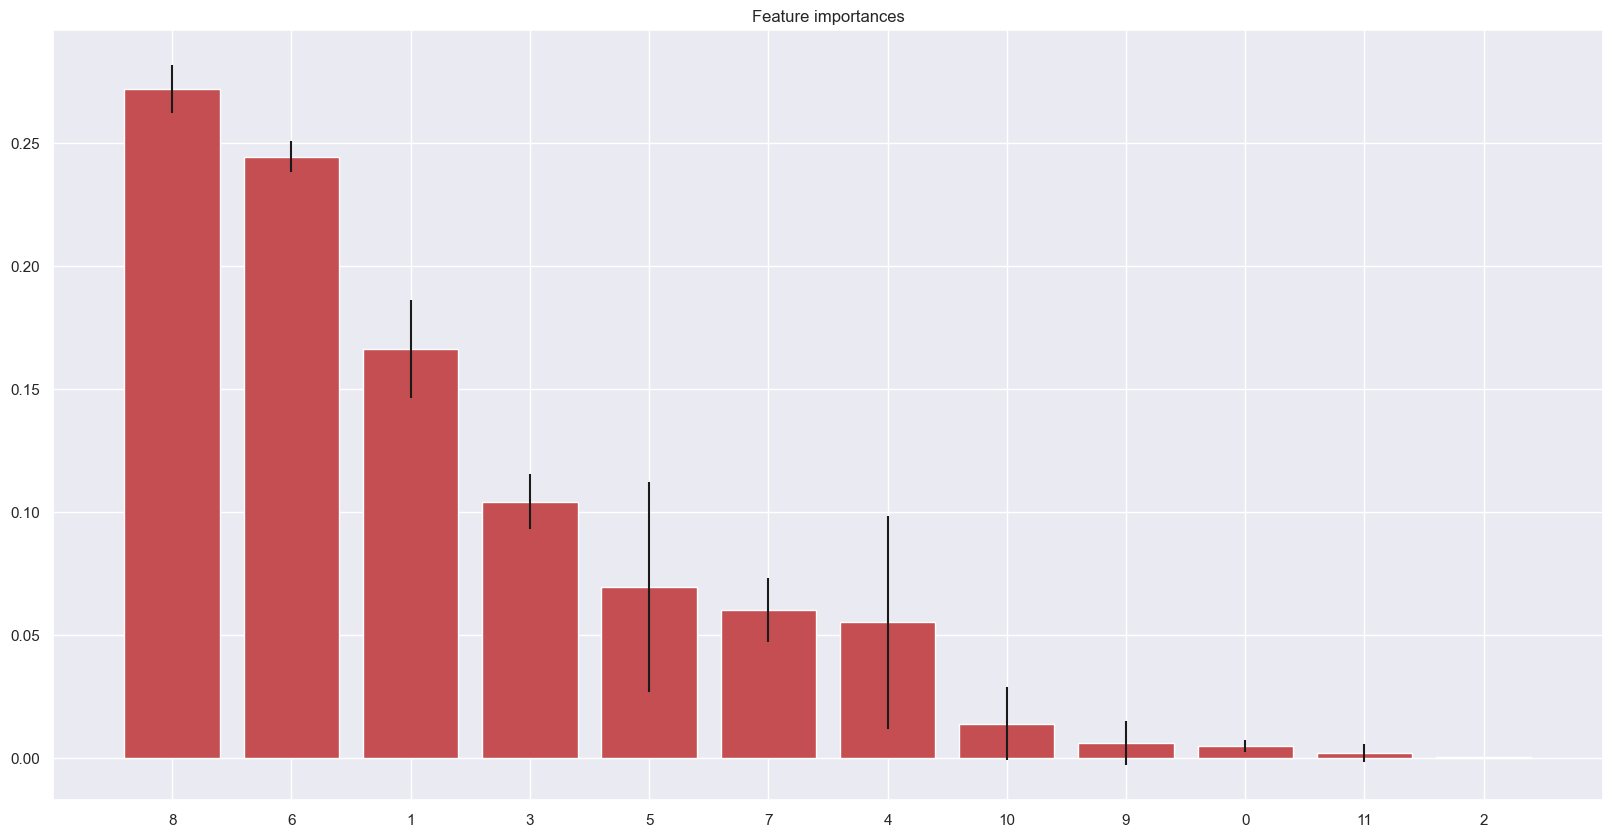

In [174]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
df = pd.DataFrame()
for i, j in zip( x_train_n, forest.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False ) )

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_n.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

# 7.0. Machine Learning

In [175]:
cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured',
                 'policy_sales_channel']

x_train = df5[ cols_selected ]
x_val = x_validation[ cols_selected ]
y_val = y_validation.copy()

## 7.1. KNN

In [176]:
#poder de gereralizacao do modelo

# model definition
knn_model = nh.KNeighborsClassifier( n_neighbors=7 )

# model training
knn_model.fit( x_train, y_train )

# model prediction - Poder de GENERALIZACAO 
yhat_knn = knn_model.predict_proba( x_val )

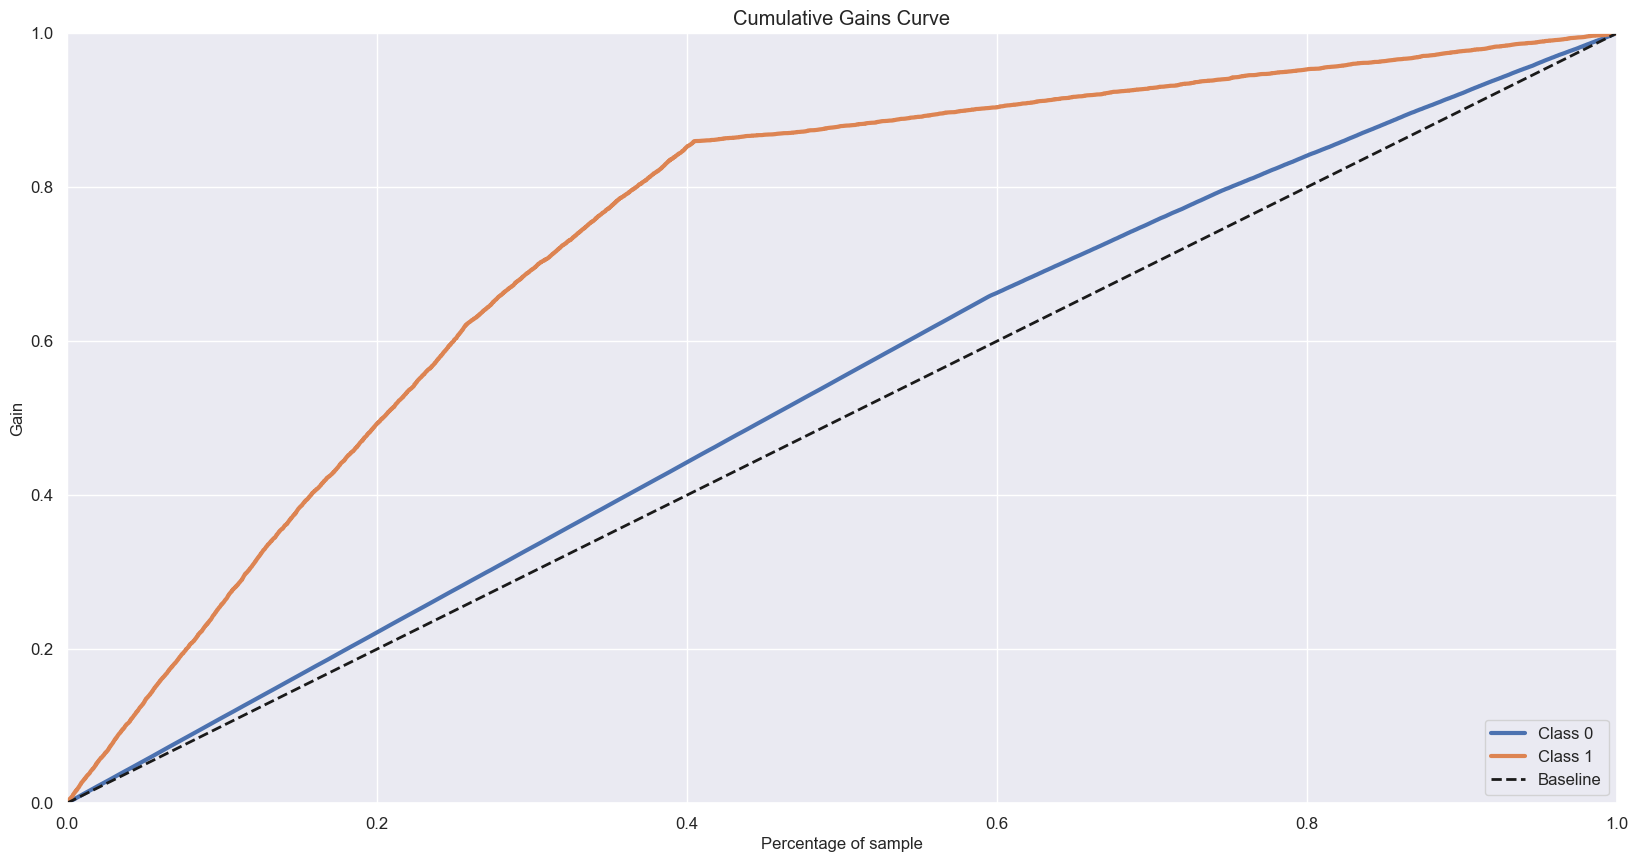

In [177]:
# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn );

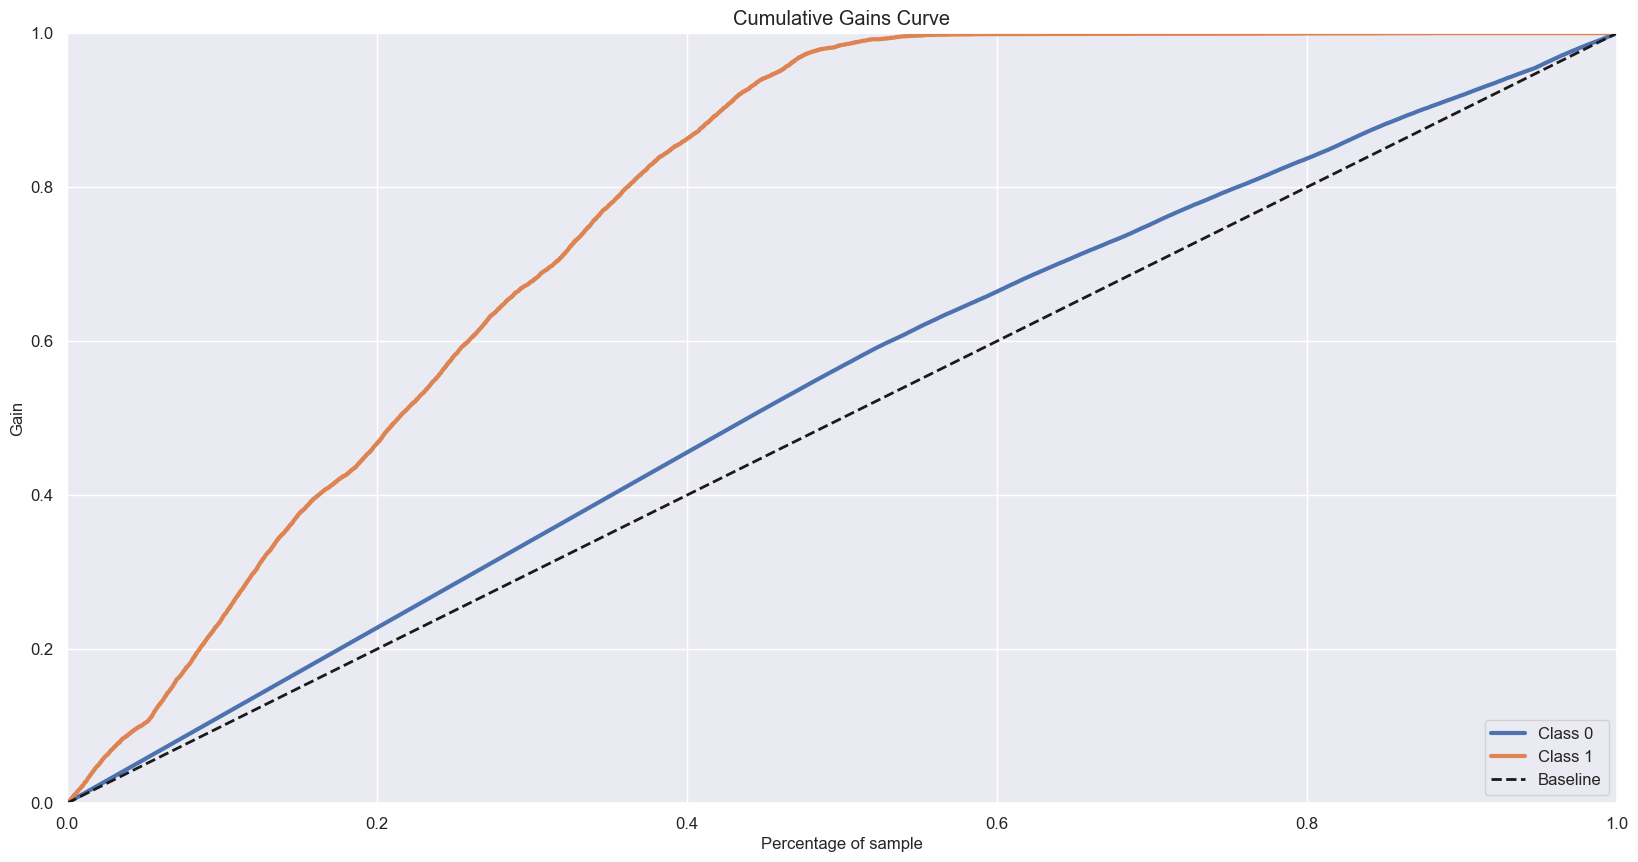

In [179]:
# model definition
lr_model = lm.LogisticRegression( random_state=42 ) 

# model training
lr_model.fit( x_train, y_train )

# model prediction
yhat_lr = lr_model.predict_proba( x_val )

# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_lr );

## 7.2. Extra Trees

In [180]:
# model definition
et = en.ExtraTreesClassifier( n_estimators=1000, n_jobs=-1, random_state=42 )

# model fit
et.fit( x_train, y_train )

# model predict
yhat_et = et.predict_proba( x_val )

In [181]:
# model predict
yhat_et = et.predict_proba( x_val )

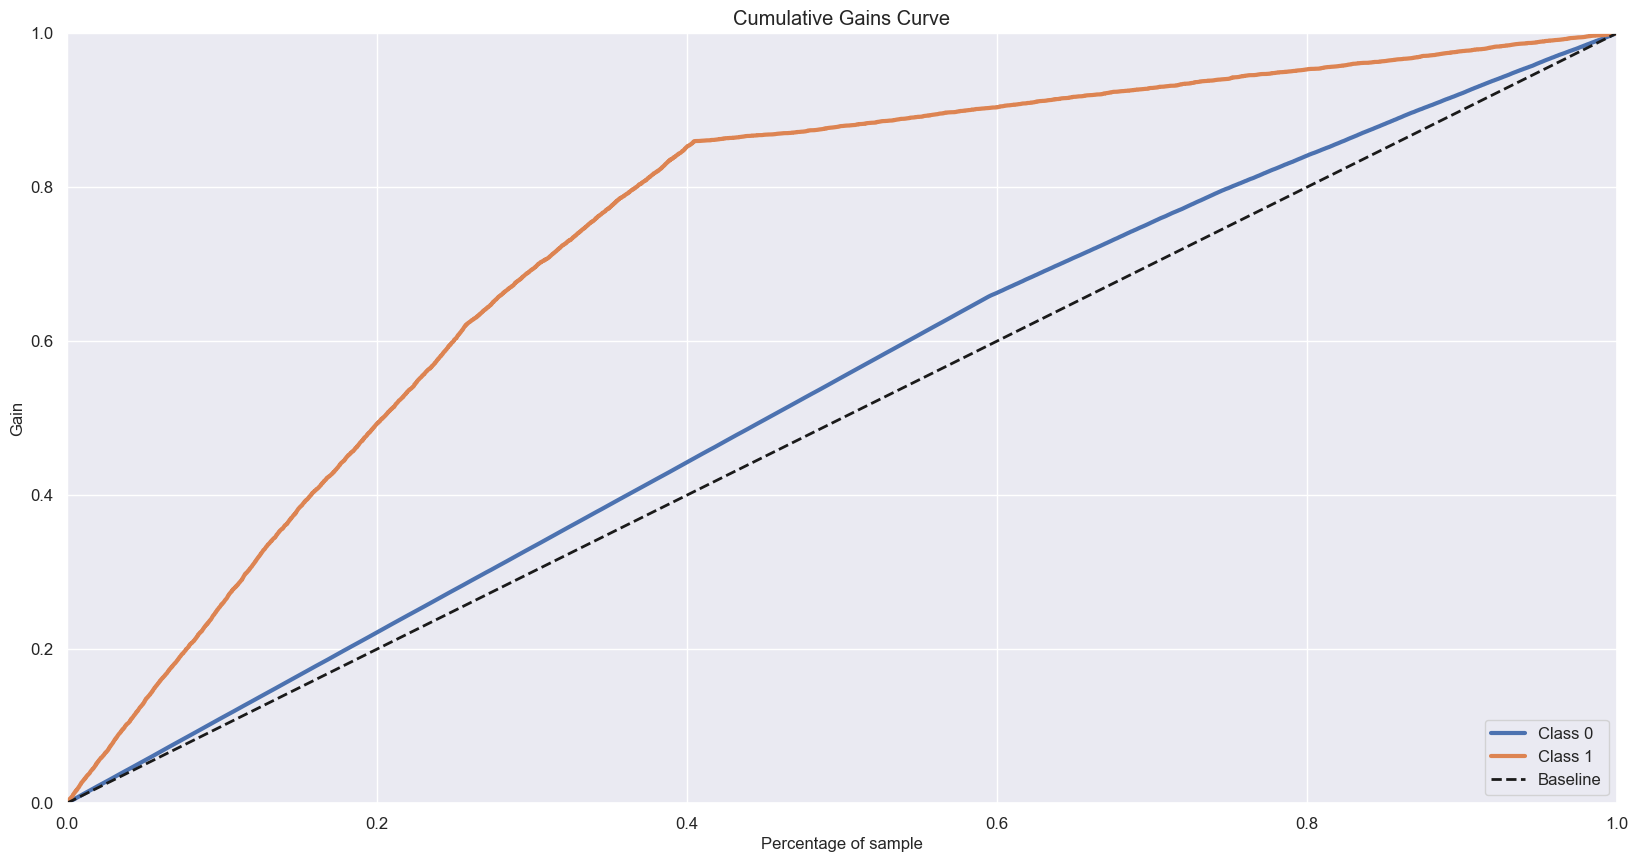

In [182]:
 # Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn );

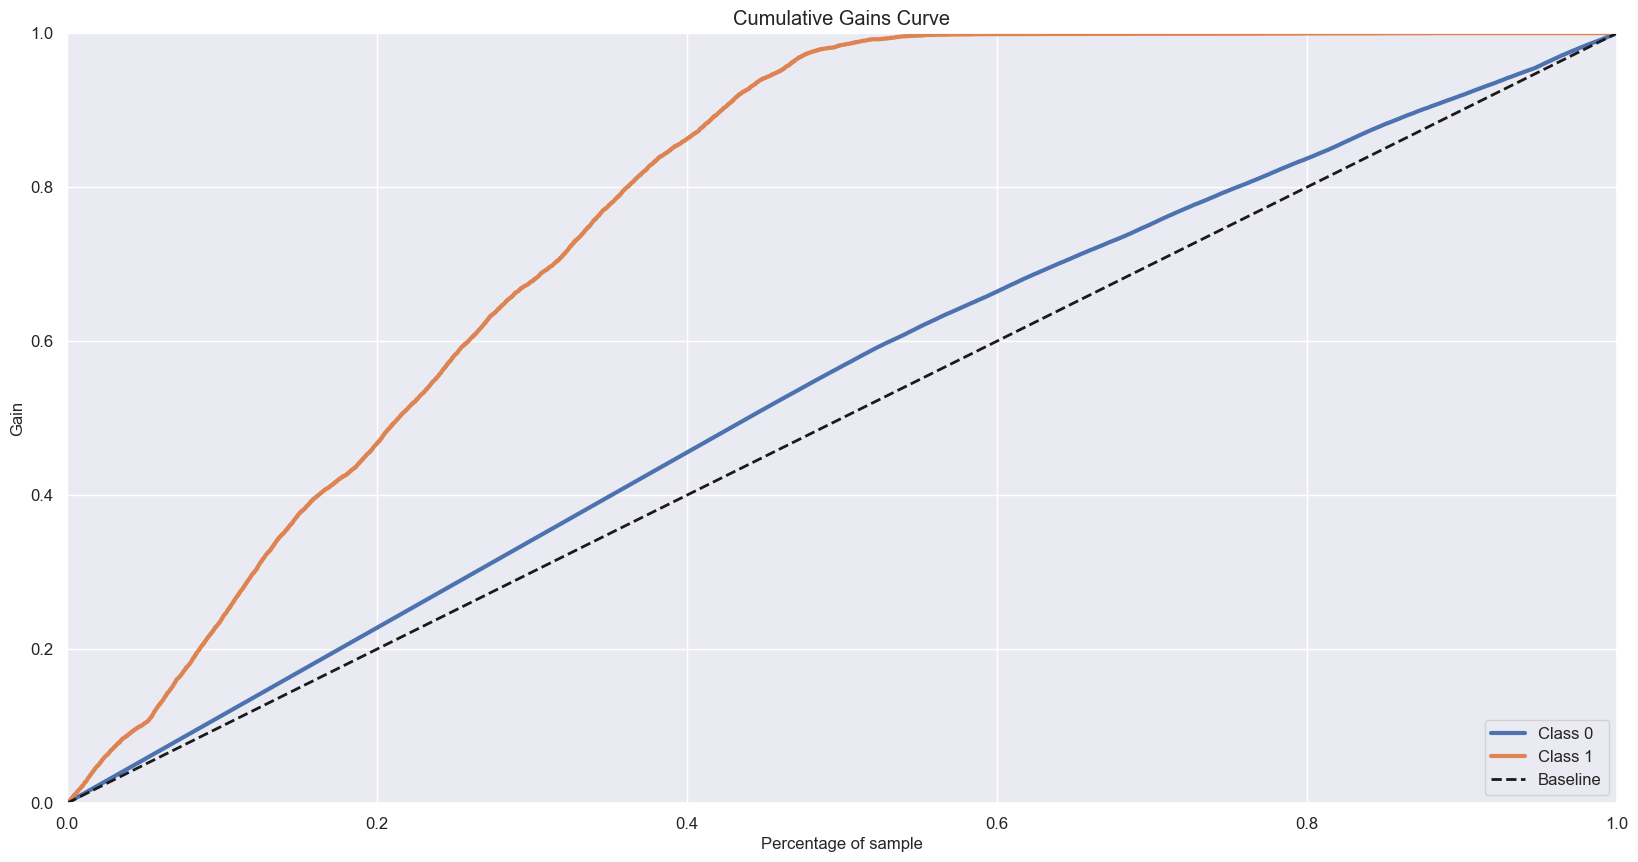

In [183]:
# model definition
lr_model = lm.LogisticRegression( random_state=42 ) 

# model training
lr_model.fit( x_train, y_train )

# model prediction
yhat_lr = lr_model.predict_proba( x_val )

# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_lr );

# 8.0. Model Performance 

In [122]:
def precision_at_k( data, k=2000 ):
    # reset index
    data = data.reset_index( drop=True )

    # create ranking order
    data['ranking'] = data.index + 1 

    data['precision_at_k'] = data['response'].cumsum() / data['ranking']

    return data.loc[k, 'precision_at_k']


In [123]:
def recall_at_k( data, k=2000 ):
    # reset index
    data = data.reset_index( drop=True )

    # create ranking order
    data['ranking'] = data.index + 1 

    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()

    return data.loc[k, 'recall_at_k']


In [124]:
# copy data
df8 = x_validation.copy()
df8['response'] = y_validation.copy()

# propensity score
df8['score'] = yhat_knn[:, 1].tolist()

# sorte clients by propensity score
df8 = df8.sort_values( 'score', ascending=False )

# compute precision at k
precision_at_50 = precision_at_k( df8, k=50 )
print( 'Precision at K: {}'.format( precision_at_50 ) )

# compute precision at k
precision_at_50 = recall_at_k( df8, k=50 )
print( 'Recall at K: {}'.format( precision_at_50 ) )

Precision at K: 0.47058823529411764
Recall at K: 0.0025957170668397143


In [102]:
# copy data
df8 = x_validation.copy()
df8['response'] = y_validation.copy()

# propensity score
df8['score'] = yhat_knn[:, 1].tolist()

# sorte clients by propensity score
df8 = df8.sort_values( 'score', ascending=False )

# compute precision at k
precision_at_50 = precision_at_k( df8, k=50 )
print( 'Precision at K: {}'.format( precision_at_50 ) )

# compute precision at k
precision_at_50 = recall_at_k( df8, k=50 )
print( 'Recall at K: {}'.format( precision_at_50 ) )

Precision at K: 0.35294117647058826
Recall at K: 0.001923282401966022
